In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_PL = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Poland')].copy()

In [4]:
df_DA_PL = df_DA_PL.dropna(subset=['salary_year_avg'])

df_DA_PL_exploded = df_DA_PL.explode('job_skills')

df_DA_PL_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1490,43200.0,gdpr
1490,43200.0,sap
1490,43200.0,powerpoint
1490,43200.0,excel
6567,56700.0,r


In [5]:
df_DA_skills = df_DA_PL_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_PL)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,26,102500.00,60.465116
excel,16,74250.00,37.209302
python,15,102500.00,34.883721
tableau,13,111175.00,30.232558
gcp,10,106837.50,23.255814
power bi,8,82350.00,18.604651
spark,8,111175.00,18.604651
looker,6,111175.00,13.953488
windows,5,111175.00,11.627907


In [6]:
from adjustText import adjust_text

In [7]:
from matplotlib.ticker import PercentFormatter

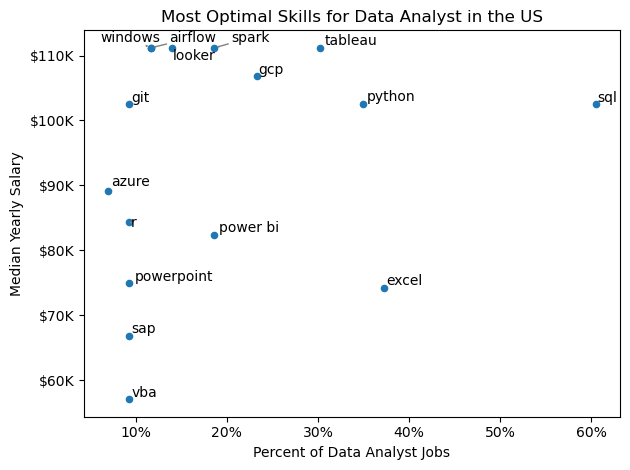

In [8]:
df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [9]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['spreadsheet',
  'cognos',
  'datarobot',
  'splunk',
  'word',
  'esquisse',
  'microstrategy',
  'dax',
  'visio',
  'spss',
  'powerbi',
  'tableau',
  'msaccess',
  'looker',
  'power bi',
  'sap',
  'ssrs',
  'excel',
  'sheets',
  'sharepoint',
  'qlik',
  'ssis',
  'outlook',
  'powerpoint',
  'ms access',
  'sas',
  'nuix',
  'alteryx'],
 'programming': ['assembly',
  'erlang',
  'bash',
  't-sql',
  'elixir',
  'solidity',
  'css',
  'ocaml',
  'julia',
  'r',
  'html',
  'nosql',
  'shell',
  'visual basic',
  'sql',
  'visualbasic',
  'c',
  'powershell',
  'apl',
  'ruby',
  'fortran',
  'vb.net',
  'java',
  'haskell',
  'lua',
  'c#',
  'dart',
  'cobol',
  'swift',
  'python',
  'vba',
  'sass',
  'clojure',
  'golang',
  'mongodb',
  'groovy',
  'scala',
  'objective-c',
  'php',
  'kotlin',
  'pascal',
  'mongo',
  'f#',
  'c++',
  'go',
  'matlab',
  'perl',
  'delphi',
  'sas',
  'crystal',
  'lisp',
  'rust',
  'no-sql',
  'typescript',
  'javascr

In [10]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,spreadsheet
0,analyst_tools,cognos
0,analyst_tools,datarobot
0,analyst_tools,splunk
0,analyst_tools,word
...,...,...
9,sync,microsoft teams
9,sync,webex
9,sync,wire
9,sync,mattermost


In [11]:
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,26,102500.00,60.465116,programming,sql
1,16,74250.00,37.209302,analyst_tools,excel
2,15,102500.00,34.883721,programming,python
3,13,111175.00,30.232558,analyst_tools,tableau
4,10,106837.50,23.255814,cloud,gcp
5,8,82350.00,18.604651,analyst_tools,power bi
6,8,111175.00,18.604651,libraries,spark
7,6,111175.00,13.953488,analyst_tools,looker
8,5,111175.00,11.627907,os,windows
9,5,111175.00,11.627907,libraries,airflow


In [12]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_percent]

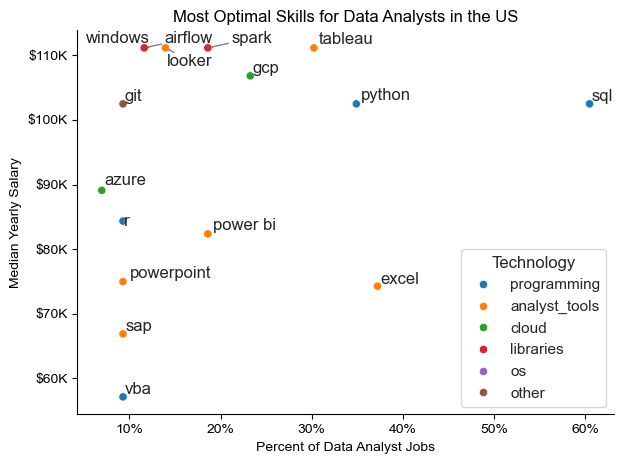

In [13]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()